In [1]:
import numpy as np
import string
import re
import math
from random import shuffle
from collections import Counter
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sn

# I. Substitution Ciphers

## 1. Modulo Arithmetic

In mathematics, modular arithmetic is a system of arithmetic for integers, where numbers "wrap around" upon reaching a certain value—the modulus. Modular arithmetic can be handled mathematically by introducing a congruence relation on the integers that is compatible with the operations on integers: addition, subtraction, and multiplication. For a positive integer n, two numbers a and b are said to be congruent modulo n, if their difference a − b is an integer multiple of n (that is, if there is an integer k such that a − b = kn). This congruence relation is typically considered when a and b are integers, and is denoted as:  

$a$ = $b$ mod $n$

In [2]:
# Example
print('15 modulo 4:', np.mod(15,4))
print('-5 modulo 3:', np.mod(-5,3))

15 modulo 4: 3
-5 modulo 3: 1


The result from `-17 mod 4` may be somewhat surprising. Taking into account that the modulo (or remainder) **must** be positive, let's implement the two cases, performing a modulos operation on a positive and a negative number, explicitely.

In [3]:
def mod_pos(dividend, divisor):
    while dividend >= divisor:
        dividend -= divisor
    return dividend

print(mod_pos(15, 4))
print(mod_pos(3, 3))
print(mod_pos(13, 2))

3
0
1


In [4]:
def mod_neg(dividend, divisor):
    while dividend < 0:
        dividend += divisor
    return dividend

print(mod_neg(-5, 3))
print(mod_neg(-17, 4))

1
3


## 2. Caesar Cipher

In cryptography, a Caesar cipher, also known as Caesar's cipher, the shift cipher, Caesar's code or Caesar shift, is one of the simplest and most widely known encryption techniques. It is a type of substitution cipher in which each letter in the plaintext is replaced by a letter some fixed number of positions down the alphabet.

In [5]:
class CaesarCipher:
    def __init__(self, key=3):
        self.key = key%26
        
        self.e = dict(zip(string.ascii_lowercase, string.ascii_lowercase[self.key:]
                          + string.ascii_lowercase[:self.key]))
        self.e.update(dict(zip(string.ascii_uppercase, string.ascii_uppercase[self.key:]
                               + string.ascii_uppercase[:self.key])))

        self.d = dict(zip(string.ascii_lowercase[self.key:] + string.ascii_lowercase[:self.key],
                          string.ascii_lowercase))
        self.d.update(dict(zip(string.ascii_uppercase[self.key:] + string.ascii_uppercase[:self.key],
                               string.ascii_uppercase)))
        
    def encrypt(self, plaintext):
        """Converts plaintext to ciphertext.
        :param str plaintext: The message to encrypt.
        :return: The ciphertext.
        :rtype: str
        """
        return ''.join([self.e[letter]
                        if letter in self.e else letter
                        for letter in plaintext])

    def decrypt(self, ciphertext):
        """ Converts ciphertext to plaintext.
        :param str ciphertext: The message to decrypt.
        :return: The plaintext.
        :rtype: str
        """
        return ''.join([self.d[letter]
                        if letter in self.d else letter
                        for letter in ciphertext])

In [6]:
with open('alice_ch1.txt', 'r', encoding='utf8') as file:
    txt_file = file.read().replace('\n', ' ')

In [7]:
print('Original: ', txt_file[:100])
c = CaesarCipher(4)
cipher_txt = c.encrypt(txt_file[:100])
print('Encrypted:', cipher_txt)                        
plain_txt = c.decrypt(cipher_txt)
print('Decrypted:', plain_txt)

Original:  CHAPTER I. Down the Rabbit-Hole  Alice was beginning to get very tired of sitting by her sister on t
Encrypted: GLETXIV M. Hsar xli Veffmx-Lspi  Epmgi aew fikmrrmrk xs kix zivc xmvih sj wmxxmrk fc liv wmwxiv sr x
Decrypted: CHAPTER I. Down the Rabbit-Hole  Alice was beginning to get very tired of sitting by her sister on t


## 3. Monoalphabetic Cipher

A monoalphabetic substitution cipher, also known as a simple substitution cipher, relies on a fixed replacement structure. That is, the substitution is fixed for each letter of the alphabet. Thus, if "a" is encrypted to "R", then every time we see the letter "a" in the plaintext, we replace it with the letter "R" in the ciphertext.

In [8]:
class MonoAlphabetic:
    
    def make_key(self, pool=None):
        """
        Generate a Monoalphabetic Cipher
        """
        if pool is None:
            pool = string.ascii_lowercase
        original_pool = list(pool)
        shuffled_pool = list(pool)
        shuffle(shuffled_pool)
        return dict(zip(original_pool, shuffled_pool))

    def make_inverse_key(self, monoalpha_cipher):
        inverse_monoalpha = {}
        for key, value in monoalpha_cipher.items():
            inverse_monoalpha[value] = key
        return inverse_monoalpha
    
    def encrypt_with_monoalpha(self, message, monoalpha_cipher):
        encrypted_message = []
        for letter in message:
            encrypted_message.append(monoalpha_cipher.get(letter, letter))
        return ''.join(encrypted_message)

    def decrypt_with_monoalpha(self, encrypted_message, monoalpha_cipher):
        return self.encrypt_with_monoalpha(encrypted_message, self.make_inverse_key(monoalpha_cipher))

In [9]:
ma = MonoAlphabetic()
key = ma.make_key()
cipher_text = ma.encrypt_with_monoalpha("meet me later", key)
print('Encrypted text:', cipher_text)
decrypt_text = ma.decrypt_with_monoalpha(cipher_text, key)
print('Decrypted text:', decrypt_text)

Encrypted text: wjjr wj vkrjx
Decrypted text: meet me later


## 4. Natural Language Redundancy

The frequency with which certain letters occur in the words of a particular language underlies the sensitivity of the monoalphabetic cipher to cryptanalysis. From the word frequencies below, we can see that the letter `e` is the most frequent in a 'randomly chosen text.

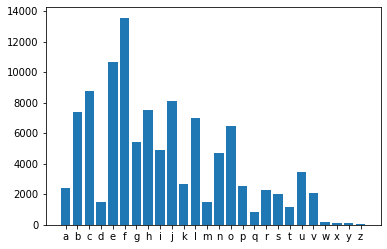

In [10]:
txt_file = re.sub('[^a-zA-Z]+', '', txt_file).lower() # remove non-alpha characters and convert to lower case
counts=Counter(txt_file)
counts.values()
plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), sorted(counts.keys()));

Such statistics based cryptanalysis will become more accurate as there are more samples to support the statistics.
In addition, using a pair of letters, the letter H is more likely to follow the letter T than others, while the letter U is likely to follow the letter Q. Also, among the triplet of letters T, H, E occur very often as well. Therefore, a frequency based cryptanalysis technique can also be used by analyzing the sequence of alphabets.  
The ideal case for cryptography is when the alphabets have uniform distribution and they have equal probabilities of occurrence which maximizes the information entropy of the alphabets.
Polyalphabetic ciphers try to smooth out the frequency distribution and make the distribution closer to a uniform distribution. 

## 5. Polyalphabetic Cipher (Vignere)

A polyalphabetic cipher is any cipher based on substitution, using multiple substitution alphabets. The Vigenère cipher has several Caesar ciphers in sequence with different shift values. The Vignere table has the alphabet written out 26 times in different rows, each alphabet shifted cyclically to the left compared to the previous alphabet, corresponding to the 26 possible Caesar ciphers. At different points in the encryption process, the cipher uses a different alphabet from one of the rows. The alphabet used at each point depends on a repeating keyword. Although there are 26 key rows, a code will use only as many keys (different alphabets) as there are unique letters in the key string, for example 5 keys in {L, E, M, O, N}. For successive letters of the message, successive letters of the key string will be taken and each message letter enciphered by using its corresponding key row. The next letter of the key is chosen, and that row is gone along to find the column heading that matches the message character. The letter at the intersection of [key-row, msg-col] is the enciphered letter.

<img src="vignere_table.png" alt="Vignere Table" style="width: 400px;"/>

Given the following:

Plaintext: ATTACKATDAWN  
Key: LEMONLEMONLE  
Ciphertext: LXFOPVEFRNHR  

The first letter of the plaintext, `A`, is paired with `L`, the first letter of the key. Therefore, `row L` and `column A` of the Vigenère square are used, namely `L`. Similarly, for the second letter of the plaintext, the second letter of the key is used. The letter at `row E` and `column T` is `X`. The rest of the plaintext is enciphered in a similar fashion.  

Decryption is performed by going to the row in the table corresponding to the key, finding the position of the ciphertext letter in that row and then using the column's label as the plaintext. For example, in `row L` (from LEMON), the ciphertext `L` appears in `column A`, which is the first plaintext letter. Next, in `row E` (from LEMON), the ciphertext X is located in `column T`. Thus `T` is the second plaintext letter.  

Source: https://en.wikipedia.org/wiki/Vigen%C3%A8re_cipher

In [11]:
class Vignere:

    def generateKey(self, string, key): 
        """
        Inputs: a string containing the message to be decrypted and a string specifying the key.
        Output: a multiple of the key based on the length of the input string.
        """
        key = list(key) 
        if len(string) == len(key): 
            return(key) 
        else: 
            for i in range(len(string) - 
                           len(key)): 
                key.append(key[i % len(key)]) 
        return("" . join(key)) 

    def cipherText(self, string, key): 
        cipher_text = [] 
        for i in range(len(string)): 
            x = (ord(string[i]) + 
                 ord(key[i])) % 26
            x += ord('A') 
            cipher_text.append(chr(x)) 
        return("" . join(cipher_text)) 

    def originalText(self, cipher_text, key): 
        orig_text = [] 
        for i in range(len(cipher_text)): 
            x = (ord(cipher_text[i]) - 
                 ord(key[i]) + 26) % 26
            x += ord('A') 
            orig_text.append(chr(x)) 
        return("" . join(orig_text)) 

In [12]:
v = Vignere()

string = "ATTACKATDAWN"
keyword = "BASEBALL"

key = v.generateKey(string, keyword) 
cipher_text = v.cipherText(string,key) 

print('Ciphertext :', cipher_text) 
print('Original/Decrypted Text :', v.originalText(cipher_text, key)) 

Ciphertext : BTLEDKLEEAOR
Original/Decrypted Text : ATTACKATDAWN


# II. Transposition Ciphers

## 1. Rail Fence Cipher  

In the rail fence cipher, the plain text is written downwards and diagonally on successive "rails" of an imaginary fence, then moving up when the bottom rail is reached. When the top rail is reached, the message is written downwards again until the whole plaintext is written out. The message is then read off in rows. For example, with 3 "rails" and a message 'DEFEND THE EAST WALL XX', the cipher text becomes 'DNETLEEDHESWLXFTAAX'.

<img src="rail_fence.jpg" alt="Vignere Table" style="width: 400px;"/> 

Source: https://en.wikipedia.org/wiki/Rail_fence_cipher

In [13]:
class RailFence:

    def encrypt(self, s, n):
        fence = [[] for i in range(n)]
        rail  = 0
        var   = 1

        for char in s:
            fence[rail].append(char)
            rail += var

            if rail == n-1 or rail == 0:
                var = -var

        res = ''
        for i in fence:
            for j in i:
                res += j

        return res

    def decrypt(self, s, n):
        fence = [[] for i in range(n)]
        rail  = 0
        var   = 1

        for char in s:
            fence[rail].append(char)
            rail += var

            if rail == n-1 or rail == 0:
                var = -var

        rFence = [[] for i in range(n)]

        i = 0
        l = len(s)
        s = list(s)
        for r in fence:
            for j in range(len(r)):
                rFence[i].append(s[0])
                s.remove(s[0])
            i += 1

        rail = 0
        var  = 1
        r = ''
        for i in range(l):
            r += rFence[rail][0]
            rFence[rail].remove(rFence[rail][0])
            rail += var

            if rail == n-1 or rail == 0:
                var = -var

        return r

In [14]:
rf = RailFence()
cipher_text = rf.encrypt(txt_file[:20], 3)
print('Ciphertext :', cipher_text)
print('Original/Decrypted:', rf.decrypt(cipher_text, 3))

Ciphertext : ctdtahpeionhrbiarweb
Original/Decrypted: chapteridowntherabbi


## 2. Permutation Cipher  

A transposition cipher is a method of encryption by which the positions held by units of plaintext (which are commonly characters or groups of characters) are shifted according to a regular system, so that the ciphertext constitutes a permutation of the plaintext. The key for the columnar transposition cipher is a keyword, e.g. `GERMAN`. The row length that is used is the same as the length of the keyword. The plaintext is then written, row by row, such that the length of each row is the same length as the keyword. Padding with a special, low-frequency, character such as `x` may be used to fill up the last row as necessary. 

<img src="permutation_1.png" alt="Vignere Table" style="width: 100px;"/> 
 

Subsequently, the columns are now reordered such that the letters in the key word are ordered alphabetically and the cipher text is read along the columns from left to the right.

<img src="permutation_2.png" alt="Vignere Table" style="width: 100px;"/> 
 

In the example shown above the cipher text would be:  

`nalcxehwttdttfseeleedsoaxfeahl`

Source: http://practicalcryptography.com/ciphers/columnar-transposition-cipher/

In [15]:
class Permute:
    
    def encrypt(self, msg, key):
        msg += 'x'*(math.ceil(len(msg) / len(key)) * len(key) - len(msg))
        key = [ord(ch) for ch in key]
        sorted_key = sorted(key)
        n_columns = len(key)
        n_rows = int(len(msg)/n_columns)
        rows = [msg[i:i+n_columns] for i in range(0, len(msg), n_columns)]
        rows_t = list(map(list, zip(*rows)))
        cipher_text = ''
        for num in sorted_key:
            cipher_text += ''.join(rows_t[key.index(num)])
        return cipher_text

    def decrypt(self, msg, key):
        key = [ord(ch) for ch in key]
        sorted_key = sorted(key)
        n_columns = len(key)
        n_rows = int(len(msg)/n_columns)
        rows = [msg[i:i+n_rows] for i in range(0, len(msg), n_rows)]
        res = []
        for num in key:
            res.append(rows[sorted_key.index(num)])
        res_t = list(map(list, zip(*res)))
        decoded_text = ''.join([item for sublist in res_t for item in sublist])
        return decoded_text

key = 'GERMAN'
plain_text = 'defendtheeastwallofthecastle'

p = Permute()
cipher_text = p.encrypt(plain_text, key)
decoded_text = p.decrypt(cipher_text, key)

print('Ciphertext :', cipher_text)
print('Original/Decrypted:', p.decrypt(cipher_text, key))

Ciphertext : nalcxehwttdttfseeleedsoaxfeahl
Original/Decrypted: defendtheeastwallofthecastlexx


## 3. Product Cipher  

In cryptography, a product cipher combines two or more transformations in a manner intending that the resulting cipher is more secure than the individual components to make it resistant to cryptanalysis. The product cipher combines a sequence of simple transformations such as substitution (S-box), permutation (P-box), and modular arithmetic. A product cipher that uses only substitutions and permutations is called a SP-network. Feistel ciphers are an important class of product ciphers.  

Source: https://en.wikipedia.org/wiki/Product_cipher

In [16]:
msg = 'DEFENDTHEEASTWALLOFTHECASTLE'
key = 'GERMAN'

v = Vignere()
key = v.generateKey(msg, key) 
cipher_text = v.cipherText(msg, key) 

print('Ciphertext :', cipher_text) 
print('Original/Decrypted Text :', v.originalText(cipher_text, key))

Ciphertext : JIWQNQZLVQAFZARXLBLXYQCNYXCQ
Original/Decrypted Text : DEFENDTHEEASTWALLOFTHECASTLE


In [17]:
msg_cont = cipher_text.lower()
key = 'GERMAN'

p = Permute()
sp_cipher_text = p.encrypt(msg_cont, key)
decoded_text = p.decrypt(sp_cipher_text, key)

print('Ciphertext :', sp_cipher_text)
print('Original/Decrypted:', p.decrypt(sp_cipher_text, key))

Ciphertext : nalcxilaxxjzzlyqqxqqqfbnxwvryc
Original/Decrypted: jiwqnqzlvqafzarxlblxyqcnyxcqxx
